## 2. CUR decomposition

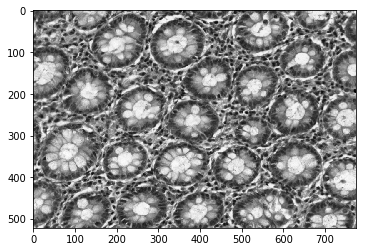

In [5]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import time

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


import math
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


#img = plt.imread("test_image.png")
img = mpimg.imread("10-12813-01-2.bmp")
gray_img = rgb2gray(img)   
#plt.clf
imgplot = plt.imshow(gray_img,cmap='gray')
plt.show()
# image = Image.open("10-12813-01-2.bmp")
# image.show()

In [3]:
def CUR_decomp(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    #print(prob_row_cumsum)
    
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        #x = np.where(prob_col_cumsum>=p)
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
        
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    # Solve U = C^(-1)*X*R^(-1)
    U = la.pinv(C) @ X @ la.pinv(R)
    return C, U, R



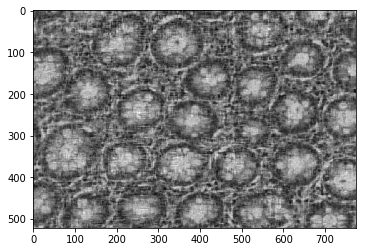

20.798303258146813
L2_norm error 3.8725554543985794%
Nuclear_norm error 46.511446934940096%
Frobenius_norm error 16.851428663182904%


In [4]:
C, U, R = CUR_decomp(gray_img, 100, 100)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


d=psnr(gray_img,C@U@R)
print(d)

print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))

In [5]:
def CUR_decomp_primitive(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    Psi = R[:,id_col].T/np.sqrt(s * prob_row[id_col,None])
    k = min(np.linalg.matrix_rank(R @ R.T,tol=1e-3),r)
    u, s, vt =  np.linalg.svd(R @ R.T)
    sinv =np.zeros(s.shape)
    idx = np.argsort(s)[::-1]
    for i in range(k):
        if s[idx[i]]<1e-3:
            sinv[idx[i]]=0
        else:
            sinv[idx[i]]=1.0/s[idx[i]]
    RRTinv = u @ np.diag(sinv) @ vt
    U = Psi @ RRTinv
    return C, U, R


In [6]:
C, U, R = CUR_decomp_primitive(gray_img, 100, 100)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))

IndexError: index 529 is out of bounds for axis 0 with size 522

In [7]:

def CUR_decomp_primitive_column(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
    id_col = np.sort(id_col)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
    id_row = np.sort(id_row)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    Psi =C[id_row,:].T/np.sqrt(r * prob_row[None, id_row])
    k = min(np.linalg.matrix_rank(C.T @ C,tol=1e-3),r)
    u, s, vt =  np.linalg.svd(C.T @ C)
    sinv =np.zeros(s.shape)
    idx = np.argsort(s)[::-1]
    for i in range(k):
        if s[idx[i]]<1e-3:
            sinv[idx[i]]=0
        else:
            sinv[idx[i]]=1.0/s[idx[i]]
    CTCinv = u @ np.diag(sinv) @ vt

    U = CTCinv @ Psi
    return C, U, R

0.35074499999999986


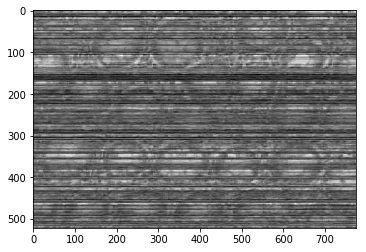

6.354036622314261
L2_norm error 88.02165544656984%
Nuclear_norm error 90.90798718426285%
Frobenius_norm error 88.88941704600623%


In [24]:

start = time.clock()
C, U, R = CUR_decomp_primitive_column(gray_img, 100, 100)   
print(time.clock() - start)
#C, U, R = CUR_decomp_primitive_column(gray_img, 100, 100)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


d=psnr(gray_img,C@U@R)
print(d)


print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))


In [22]:
k=100
u, s, vt =  np.linalg.svd(gray_img)

rankk = u[:,:k]@np.diag(s[:k])@vt[:k,:]    

#print("L2_norm of image {}".format(la.norm(gray_img,2)))

print("L2_norm error {}".format(la.norm(gray_img -(rankk),2)))
print("Nuclear_norm error {}".format(la.norm(gray_img - (rankk),'nuc')))
print("Frobenius_norm error {}".format(la.norm(gray_img - (rankk),'fro')))


L2_norm error 787.9200689021585
Nuclear_norm error 72882.08956844146
Frobenius_norm error 5087.965549606476


In [9]:
def CUR_decomp_primitive_column_2(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_2 = prob_col
    prob_row_2 = prob_row
    
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        ind = np.where(prob_col_cumsum>=p)[0][0]
        id_col[i] = int(ind)
        prob_col_2[ind]=0.0
        prob_col_cumsum = np.cumsum(prob_col_2)/np.sum(prob_col_2)
        
    id_col =np.sort(id_col)
    id_col = id_col.astype(int)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        ind = np.where(prob_row_cumsum>=p)[0][0]
        id_row[i] = int(ind)
        prob_row_2[ind]=0.0
        prob_row_cumsum = np.cumsum(prob_row_2)/np.sum(prob_row_2)
        
    id_row =np.sort(id_row)
    id_row = id_row.astype(int)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    Psi =C[id_row,:].T/np.sqrt(r * prob_row[None, id_row])
    k = min(np.linalg.matrix_rank(C.T @ C,tol=1e-3),r)
    u, s, vt =  np.linalg.svd(C.T @ C)
    sinv =np.zeros(s.shape)
    idx = np.argsort(s)[::-1]
    for i in range(k):
        if s[idx[i]]<1e-3:
            sinv[idx[i]]=0
        else:
            sinv[idx[i]]=1.0/s[idx[i]]
    CTCinv = u @ np.diag(sinv) @ vt

    U = CTCinv @ Psi
    return C, U, R

In [10]:
C, U, R = CUR_decomp_primitive_column_2(gray_img, 100, 100)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


d=psnr(gray_img,C@U@R)
print(d)

print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))

/home/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide
/home/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/home/akshay/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


LinAlgError: SVD did not converge

In [114]:

def CUR_lineartime(X, s, r):
    # Solve CUR decomposition
    
    # First compute probability
    X_square = X**2
    prob_col = np.sum(X_square,axis=0)
    prob_row = np.sum(X_square,axis=1)
    prob_col = prob_col/ np.sum(prob_col)
    prob_row = prob_row/ np.sum(prob_row)
    prob_col_2 = prob_col
    prob_row_2 = prob_row
    
    prob_col_cumsum = np.cumsum(prob_col)
    prob_row_cumsum = np.cumsum(prob_row)
    
    
    # Second sample R and C
    id_col = np.zeros(s, np.int)
    id_row = np.zeros(r, np.int)
    
    for i in range(s):
        p = rn.rand()
        ind = np.where(prob_col_cumsum>=p)[0][0]
        id_col[i] = int(ind)
        prob_col_2[ind]=0.0
        prob_col_cumsum = np.cumsum(prob_col_2)/np.sum(prob_col_2)
        
    id_col =np.sort(id_col)
    id_col = id_col.astype(int)
    C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
    for i in range(r):
        p = rn.rand()
        ind = np.where(prob_row_cumsum>=p)[0][0]
        id_row[i] = int(ind)
        prob_row_2[ind]=0.0
        prob_row_cumsum = np.cumsum(prob_row_2)/np.sum(prob_row_2)
        
    id_row =np.sort(id_row)
    id_row = id_row.astype(int)
    R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
#     for i in range(s):
#         p = rn.rand()
#         id_col[i] = np.where(prob_col_cumsum>=p)[0][0]
#     id_col = np.sort(id_col)
#     C = X[:,id_col]/np.sqrt(s * prob_col[None,id_col])
    
#     for i in range(r):
#         p = rn.rand()
#         id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
#     id_row = np.sort(id_row)
#     R = X[id_row,:]/np.sqrt(r * prob_row[id_row,None])
    
    Psi =C[id_row,:]/np.sqrt(r * prob_row[None, id_row])
    
    # Rank
    k = min(np.linalg.matrix_rank(C.T @ C,tol=1e-3),r)
    
#     # For C^T.C inverse
#     u, s, vt =  np.linalg.svd(C.T @ C)
#     sinv =np.zeros(s.shape)
#     idx = np.argsort(s)[::-1]
#     for i in range(k):
#         if s[idx[i]]<1e-3:
#             sinv[idx[i]]=0
#         else:
#             sinv[idx[i]]=1.0/s[idx[i]]
#     CTCinv = vt.T @ np.diag(sinv) @ u.T
    CTCinv = np.linalg.inv(C.T@C)
    U = CTCinv @ Psi.T
    return C, U, R


/home/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/home/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/home/akshay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/home/akshay/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
/home/akshay/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/akshay/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/akshay/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:412: UserWarnin

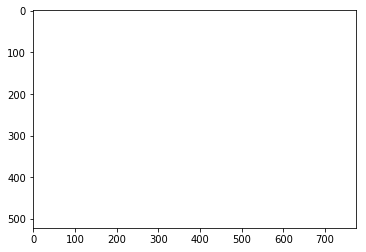

nan
L2_norm error nan%
Nuclear_norm error nan%
Frobenius_norm error nan%


In [115]:
C, U, R = CUR_lineartime(gray_img, 100, 100)
plt.clf()
plt.imshow(C @ U @ R, cmap='gray')
plt.show()


d=psnr(gray_img,C@U@R)
print(d)

print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))

For analysis of error, you can estimate $\frac{\|A-CUR\|}{\|A\|}$ and try to let the error be less than $10\%$. Below are one specific example. Based on choice of $U$, there will be three possibilities.

In [3]:
# def columnselect(X,c,k):
#     u, s, vt =  np.linalg.svd(X)
#     v_square = (vt.T)**2
#     #prob_col = np.sum(v_square,axis=0)
#     prob_row = np.sum(v_square[:,:k],axis=1)
#     #prob_col = prob_col/ np.sum(prob_col)
#     prob_row = prob_row/k
#     #prob_col_cumsum = np.cumsum(prob_col)
#     prob_row_cumsum = np.cumsum(prob_row)
    
#     id_row = np.zeros(c, np.int)
#     for i in range(c):
#         p = rn.rand()
#         id_row[i] = np.where(prob_row_cumsum>=p)[0][0]
#     id_row = np.sort(id_row)
#     #print(id_row)
#     C = X[:,id_row] /np.sqrt(c*c* prob_row[id_row,None])      
#     return C

def columnselect(X,c,k):
    
    u, s, vt =  np.linalg.svd(X)
    v_square = (vt.T)**2
    #prob_col = np.sum(v_square,axis=0)
    prob_row = np.sum(v_square[:,:k],axis=1)/k
    prob_row_2 = prob_row
    
    prob_row_cumsum = np.cumsum(prob_row)/np.sum(prob_row)
    n,d=X.shape
    #prob_row = prob_row/k
   
    count = 0
    id_row = np.ones(c)*c
    #id_row = np.zeros(c, np.int)
#     for i in range(c):
        
#         p = rn.rand()
#         a=min(1,prob_row[i])
#         if count == c:
#             print()
#             exit
#         elif a>p:
#             count+= 1
#             id_row[count] = i
#         else:
#             pass
    for i in range(c):
        p = rn.rand()
        ind = np.where(prob_row_cumsum>=p)[0][0]
        id_row[i] = int(ind)
        prob_row_2[ind]=0.0
        prob_row_cumsum = np.cumsum(prob_row_2)/np.sum(prob_row_2)
        
    id_row =np.sort(id_row)
    id_row = id_row.astype(int)
    #
    #print(id_row)
    #print(prob_row.shape)
    #print(d)
    C = np.zeros((n,c),np.float)
    for i in range(c):
        ind=id_row[i]
        #print(ind)
        C[:,i] = X[:,ind] #/np.sqrt(c*c* prob_row[id_row[i],None])      
        
    return C



def CUR_leveragescore(X,c,r):
    k = min(np.linalg.matrix_rank(X,tol=1e-3),c,r) 
    #print(k)
    C = columnselect(X,c,k)  
    #print(C.shape)
    R = columnselect(X.T,r,k)
    #print(R.shape)
    R = R.T
    U = la.pinv(C) @ X @ la.pinv(R)
    return C,U,R




50
(522, 50)
This is 1  0.8388430000000002


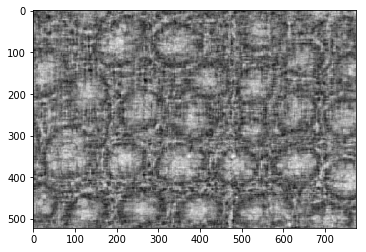

100
(522, 100)
This is 2  0.370393


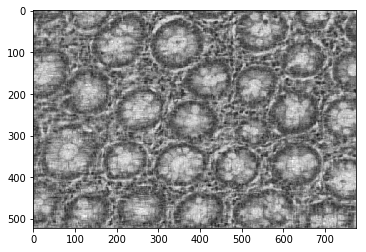

150
(522, 150)
This is 3  0.4490080000000001


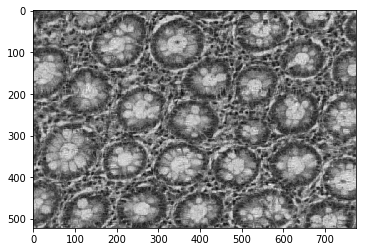

200
(522, 200)
This is 4  0.452229


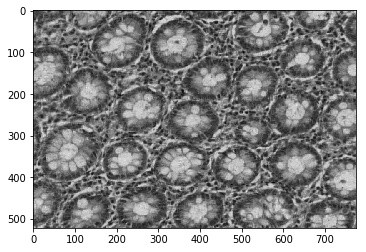

250
(522, 250)
This is 5  0.4810660000000002


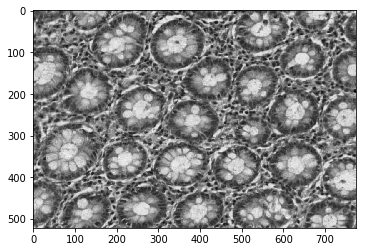

300
(522, 300)
This is 6  0.49478199999999983


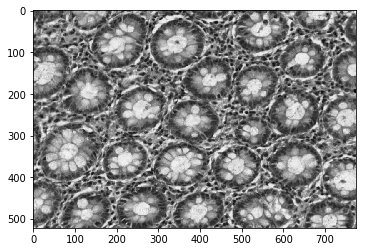

350
(522, 350)
This is 7  0.7384120000000003


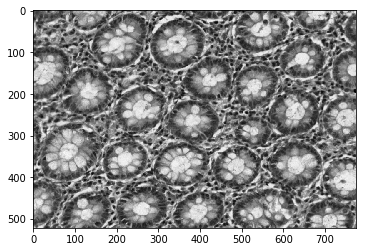

400
(522, 400)
This is 8  0.5685009999999995


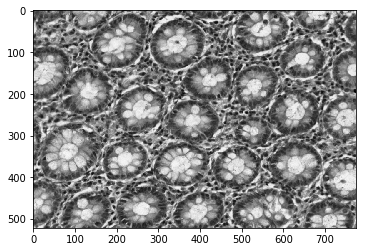

450
(522, 450)
This is 9  0.9687839999999994


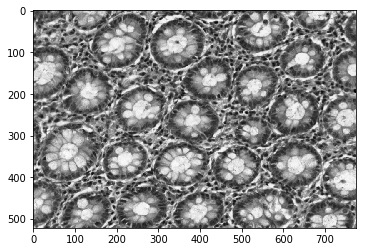

500
(522, 500)
This is 10  0.6568519999999989


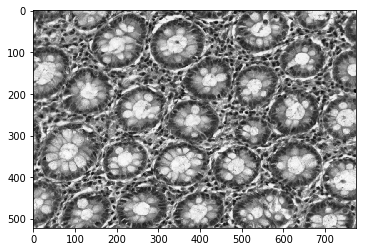

In [6]:
#print(gray_img.shape)
d=np.zeros(10)
for i in range(10):
    start = time.clock()
    C,U, R = CUR_leveragescore(gray_img, 50*(i+1), 50*(i+1))
    print("This is",i+1,"",time.clock() - start)
    plt.clf()
    plt.imshow(C @ U @ R, cmap='gray')
    plt.show()
    d[i]=psnr(gray_img,C@U@R)
    #print(d)


#C = CUR_leveragescore(gray_img, 100, 100)




# print("L2_norm error {}%".format(la.norm(gray_img -( C @ U @ R),2)/la.norm(gray_img,2)*100))
# print("Nuclear_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'nuc')/la.norm(gray_img,'nuc')*100))
# print("Frobenius_norm error {}%".format(la.norm(gray_img - (C @ U @ R),'fro')/la.norm(gray_img,'fro')*100))



[ 50 100 150 200 250 300 350 400 450 500]


Text(0,0.5,'PSNR')

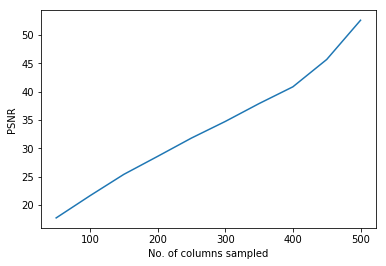

In [15]:
x = np.zeros(10,np.int)
for i in range(10):
    x[i] = (i+1)*50
print(x)
plt.plot(x,d)
plt.xlabel('No. of columns sampled')
plt.ylabel('PSNR')

For block CUR decomposition. You can try either sample in group or sample in each block. Here is one example of sample in block

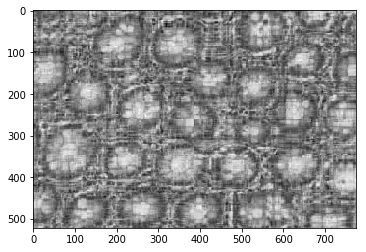

L2_norm error 4.871129554018044%
Nuclear_norm error 59.93626451668366%
Frobenius_norm error 20.983886433307436%
18.893319239798384


In [90]:
# block_img = np.zeros(gray_img.shape)

# # 8 by 8 blocks with each block 64*64
# for i in range(8):
#     for j in range(10):
#         part = gray_img[i*64:(i+1)*64,j*64:(j+1)*64]
#         C, U, R = CUR_decomp(part, 12, 12)
#         block_img[i*64:(i+1)*64,j*64:(j+1)*64] = C@U@R
        
# plt.clf()
# plt.imshow(block_img, cmap='gray')
# plt.show()


# print("L2_norm error {}%".format(la.norm(gray_img -( block_img),2)/la.norm(gray_img,2)*100))
# print("Nuclear_norm error {}%".format(la.norm(gray_img - (block_img),'nuc')/la.norm(gray_img,'nuc')*100))
# print("Frobenius_norm error {}%".format(la.norm(gray_img - (block_img),'fro')/la.norm(gray_img,'fro')*100))

block_img = np.zeros(gray_img.shape)

# 6 by 6 blocks with each block 87*129
for i in range(6):
    for j in range(6):
        part = gray_img[i*87:(i+1)*87,j*129:(j+1)*129]
        C, U, R = CUR_decomp(part, 12, 12)
        block_img[i*87:(i+1)*87,j*129:(j+1)*129] = C@U@R
        
plt.clf()
plt.imshow(block_img, cmap='gray')
plt.show()


print("L2_norm error {}%".format(la.norm(gray_img -( block_img),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (block_img),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (block_img),'fro')/la.norm(gray_img,'fro')*100))

d=psnr(gray_img,block_img)
print(d)


In [34]:
import math
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(gray_img,block_img)
print(d)

19.01683485425519


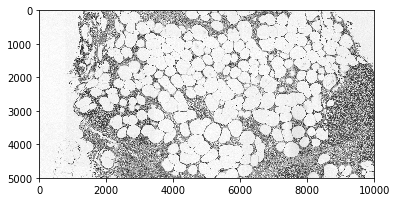

In [40]:
#img = plt.imread("test_image.png")
img = mpimg.imread("Output.jpg")
gray_img = rgb2gray(img)   
#plt.clf
imgplot = plt.imshow(gray_img,cmap='gray')
plt.show()

In [41]:
gray_img.shape

(5000, 10000)

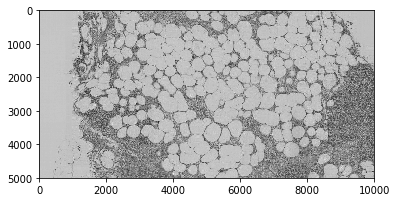

22.97322269336675
L2_norm error 0.5864106815066605%
Nuclear_norm error 51.196954958313654%
Frobenius_norm error 8.446171439043082%


In [42]:

block_img = np.zeros(gray_img.shape)

# 6 by 6 blocks with each block 500*500
for i in range(10):
    for j in range(20):
        part = gray_img[i*500:(i+1)*500,j*500:(j+1)*500]
        C, U, R = CUR_leveragescore(part, 50, 50)
        block_img[i*500:(i+1)*500,j*500:(j+1)*500] = C@U@R
        
plt.clf()
plt.imshow(block_img, cmap='gray')
plt.show()

d=psnr(gray_img,block_img)
print(d)

print("L2_norm error {}%".format(la.norm(gray_img -( block_img),2)/la.norm(gray_img,2)*100))
print("Nuclear_norm error {}%".format(la.norm(gray_img - (block_img),'nuc')/la.norm(gray_img,'nuc')*100))
print("Frobenius_norm error {}%".format(la.norm(gray_img - (block_img),'fro')/la.norm(gray_img,'fro')*100))

In [41]:
import numpy as np
from numpy.linalg import norm

from random import normalvariate
from math import sqrt


def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]


def svd_1d(A, epsilon=1e-10):
    ''' The one-dimensional SVD '''

    n, m = A.shape
    x = randomUnitVector(min(n,m))
    lastV = None
    currentV = x

    if n > m:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)

    iterations = 0
    while True:
        iterations += 1
        lastV = currentV
        currentV = np.dot(B, lastV)
        currentV = currentV / norm(currentV)

        if abs(np.dot(currentV, lastV)) > 1 - epsilon:
            print("converged in {} iterations!".format(iterations))
            return currentV


def svd(A, k=None, epsilon=1e-10):
    '''
        Compute the singular value decomposition of a matrix A
        using the power method. A is the input matrix, and k
        is the number of singular values you wish to compute.
        If k is None, this computes the full-rank decomposition.
    '''
    A = np.array(A, dtype=float)
    n, m = A.shape
    svdSoFar = []
    if k is None:
        k = min(n, m)

    for i in range(k):
        matrixFor1D = A.copy()

        for singularValue, u, v in svdSoFar[:i]:
            matrixFor1D -= singularValue * np.outer(u, v)

        if n > m:
            v = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)  # next singular value
            u = u_unnormalized / sigma
        else:
            u = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)  # next singular value
            v = v_unnormalized / sigma

        svdSoFar.append((sigma, u, v))

    singularValues, us, vs = [np.array(x) for x in zip(*svdSoFar)]
    return singularValues, us.T, vs


if __name__ == "__main__":
    movieRatings = np.array([
        [2, 5, 3],
        [1, 2, 1],
        [4, 1, 1],
        [3, 5, 2],
        [5, 3, 1],
        [4, 5, 5],
        [2, 4, 2],
        [2, 2, 5],
    ], dtype='float64')

    # v1 = svd_1d(movieRatings)
    # print(v1)



import time
start = time.clock()
sigma, u, vt = svd(movieRatings)
print(time.clock() - start)
print(u.shape)
print(sigma.shape)
print(v.shape)
u*sigma@vt
#print(theSVD)

converged in 5 iterations!
converged in 24 iterations!
converged in 2 iterations!
0.0026289999999988822
(8, 3)
(3,)
(3, 3)


array([[2., 5., 3.],
       [1., 2., 1.],
       [4., 1., 1.],
       [3., 5., 2.],
       [5., 3., 1.],
       [4., 5., 5.],
       [2., 4., 2.],
       [2., 2., 5.]])

In [40]:
import time
start = time.clock()
u, s, vt =  np.linalg.svd(movieRatings)
print(time.clock() - start)

print(u.shape)
print(s.shape)
print(vt.shape)


u[:,:3]@np.diag(s)@vt

0.0010399999999997078
(8, 8)
(3,)
(3, 3)


array([[2., 5., 3.],
       [1., 2., 1.],
       [4., 1., 1.],
       [3., 5., 2.],
       [5., 3., 1.],
       [4., 5., 5.],
       [2., 4., 2.],
       [2., 2., 5.]])

In [11]:
X = np.random.rand(4,4)
X

array([[0.90578481, 0.77611267],
       [0.5586657 , 0.14140001]])

In [42]:
X_square = X**2
print(X_square)
X_square = X**2
prob_col = np.sum(X_square,axis=0)
prob_row = np.sum(X_square,axis=1)

print(np.sum(prob_col))
print(np.sum(prob_row))
prob_col = prob_col/ np.sum(prob_col)
prob_row = prob_row/ np.sum(prob_row)
prob_col_cumsum = np.cumsum(prob_col)
prob_row_cumsum = np.cumsum(prob_row)
    


[[0.82044613 0.60235088]
 [0.31210737 0.01999396]]
1.7548983368866455
1.754898336886645


In [28]:
print(prob_col_cumsum) 
print(prob_row_cumsum) 

prob_col

[0.64536701 1.        ]
[0.81075751 1.        ]


In [50]:
p = np.random.rand()
p 

0.518736990601663

In [51]:
np.where(prob_col_cumsum>=p)

(array([0, 1]),)

In [52]:
np.where(prob_col_cumsum>=p)[0]

array([0, 1])

In [106]:
#id_col = np.where(prob_col_cumsum>=p)[0]
#print(X[:,id_col])
#d=np.ones(2)*
#d = 10
d = np.zeros(2,np.float)
d = [9.8,8.9]
#int(d)